In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Another Approach to Regression

We can use the Nearest Neighbors approach to consider our earlier problem involving finding the line of best fit for the `mtcars` dataset.  Now, we want to assign $y$-values based on the nearest $k$ neighbors.  Plotting the result of two iterations with different values for $k$ surfaces important considerations.

In [4]:
mtcars = pd.read_csv('data/mtcars.csv')

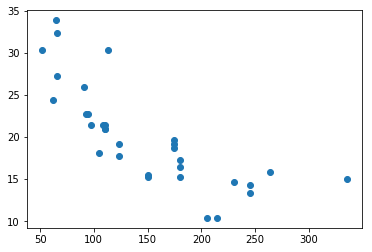

In [5]:
plt.scatter(mtcars['hp'], mtcars['mpg'])

In [6]:
from sklearn.neighbors import KNeighborsRegressor
#from the neighbors library

In [7]:
X = mtcars['hp'].values.reshape(-1,1)
y = mtcars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y)

#if you're importing 1 feature into X you have to reshape it

In [8]:
regress = KNeighborsRegressor(n_neighbors=5)
regress2 = KNeighborsRegressor(n_neighbors=20)

#instantiate empty models!!
#predict Y based on 5 closest values

In [11]:
regress.fit(X_train, y_train)
regress2.fit(X_train, y_train)

#fit them!!

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [12]:
pred_5 = regress.predict(X_test)
pred_20 = regress2.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
print('Error with 5 is', np.sqrt(mean_squared_error(pred_5, y_test)), 'and 20 is', np.sqrt(mean_squared_error(pred_20, y_test)))

Error with 5 is 1.4998833287959437 and 20 is 3.2140939625343887


In [15]:
x = mtcars.sort_values('hp')
y2 = regress.predict(x['hp'].values.reshape(-1,1))
y3 = regress2.predict(x['hp'].values.reshape(-1,1))

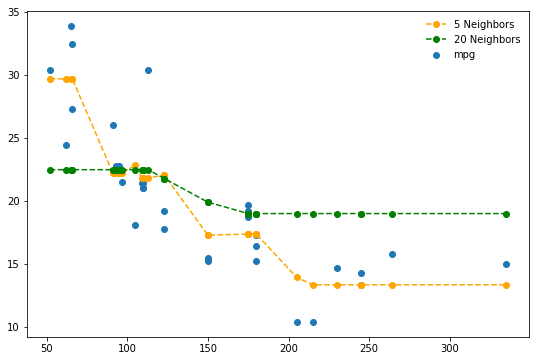

In [16]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['hp'], mtcars['mpg']);
plt.plot(x['hp'], y2, '--o', color = 'orange', label = '5 Neighbors');
plt.plot(x['hp'], y3, '--o', color = 'green', label = '20 Neighbors');
plt.legend(frameon = False)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
params = {'n_neighbors': [i for i in range(3, 14)]}

In [21]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring = 'mean_squared_error')

#pass the model, the parameters and then the scoring term
#Means the scoring is done off MSE not R-sq

In [22]:
grid.fit(X_train, y_train)

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [23]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [26]:
best = grid.best_estimator_

In [27]:
best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [28]:
pred = best.predict(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [31]:
print("With KNNeighbors: {:.2f}".format(np.sqrt(mean_squared_error(pred, y_test))), "\nLinear Regression with OLS: {:.2f}".format(np.sqrt(mean_squared_error(pred_lr, y_test))))

With KNNeighbors: 3.00 
Linear Regression with OLS: 6.73


In [ ]:
#this is non-parametric model
#if you're using more than one feature you wouldn't be able to tell which feature had the largest impact
#popular to use for imputation of missing values
#classification problem - 

In [47]:
from sklearn.datasets import load_iris

In [51]:
iris = load_iris()

In [53]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [54]:
X = iris.data
y = iris.target
y[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [59]:
pred

array([1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1])

In [60]:
y_test


array([1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1])

In [62]:
X[:,0]

#all the rows in the first column

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

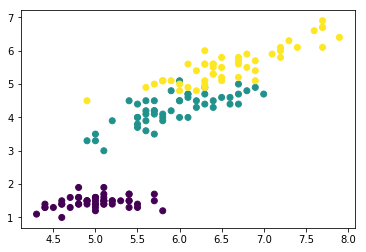

In [63]:
plt.scatter(X[:,0], X[:,2], c=y)

In [64]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,pred)

0.9736842105263158